# <center>Machine Learning and Statistics Tasks Assignment </center>

## Name : Sinead Frawley
## ID : G00376349

## <center>*Task 1*</center>

This task is to write a function callled sqrt2 that calculates  and prints to the screen the square root of 2 to 100 decimal places. 

### <center>Research on Calculation Method</center>

The method taken to calculate sqaure root of two is the  **Newton Sqaure root method**

#### Newtonian Optimization

$$0 = f(x_0) + f'(x_0)(x_1 -x_0)$$

$$x_1 - x_0 = - \frac{f(x_0)}{f'(x_0)}$$ 

$$x_1 = x_0 -\frac{f(x_0)}{f'(x_0)} $$

"*Newtonian optimization is one of the basic ideas in optimization where function to be optimized is evaluated at a random point. Afterwards, this point is shifted in the negative direction of gradient until convergence.*"[[1]](https://medium.com/@sddkal/newton-square-root-method-in-python-270853e9185d)

$$a = x^2$$

For, 
$$f(x) = x^2 - a$$
$$f'(x)=x^2 -a $$
     
$$f(x) = 2x$$

$$\frac{f(x)}{f'(x)} = \frac{x^2 -a}{2x} = \frac{x -\frac{a}{x}}{2}$$

Since,

$$x_{n+1} - x_n = -\frac{f(x_n)}{f'(x_n)}$$

$$x_{n+1}   = x_n -\frac{x_n - \frac{a}{x_n}}{2}$$

$$x_{n+1}   = \frac{x_n - \frac{a}{x_n}}{2}$$

A classic algorithm that illustrates many of these concerns is “Newton’s” method to compute square
roots $x =√a$ for $a > 0$, i.e. to solve $x^2 = a$. The algorithm starts with some guess x1 > 0 and
computes the sequence of improved guesses [[2]](https://math.mit.edu/~stevenj/18.335/newton-sqrt.pdf )

$$x_{n+1} = \frac{1}{2}(x_{n} + \frac{a}{x_{n}})$$
.

In [4]:

def sqrt2( number_iters = 500):
    a = float(2) # number to get square root of
    for i in range(number_iters): # iteration number
        a = 0.5 * (a + 2 / a) # update
        
    print("{:.100f}".format(a))
  

  

In [5]:
sqrt2()

1.4142135623730949234300169337075203657150268554687500000000000000000000000000000000000000000000000000


The code from above is based on the function newton_method in [[1]](https://medium.com/@sddkal/newton-square-root-method-in-python-270853e9185d)

## <center>*Task 2*</center>

This Task is on The Chi-squared test for independence is a statistical hypothesis test like a t-test. It is used to analyse whether two categorical variables
are independent. The Wikipedia article gives the table below as an example [[7]](https://en.wikipedia.org/wiki/Chi-squared_test), stating the Chi-squared value based on it is approximately 24.6. I used  scipy.stats
to verify this value and calculated the associated p value. 

### <center>Research on Chi Sqaured Tests</center>

The chi-square test is often used to assess the significance (if any) of the differences among k different groups. The null and alternate hypotheses of the test, are generally written as:

H<sub>0</sub>: There is no significant difference between two or more groups.

H<sub>A</sub> There exists at least one significant difference between two or more groups.

The chi-square test statistic, denoted $x^2$, is defined as the following:[[3]](https://aaronschlegel.me/chi-square-test-independence-contingency-tables.html)

$$x^2=\sum_{i=1}^r\sum_{i=1}^k\frac{(O_{ij} -E_{ij})^2}{E_{ij}}$$

Where $Oi_{j}$ is the i-th observed frequency in the j-th group and $E_{ij}$ is the corresponding expected frequency. The expected frequency can be calculated using a common statistical analysis. The expected frequency, typically denoted $E_{cr}$, where c is the column index and r is the row index. Stated more formally, the expected frequency is defined as:



$$E_{cr}= \frac{(\sum_{i=0}^{n_r}r_i)((\sum_{i=0}^{n_c}c_i)}{n}$$

Where n is the total sample size and nc,nr are the number of cells in row and column, respectively. The expected frequency is calculated for each 'cell' in the given array.

### Analysis of data using Chi Squared Test

From the data in [[7]](https://en.wikipedia.org/wiki/Chi-squared_test) . I have created calulcation on chi sqaured test below


The two hypotheses are.

1. Area and type of worker are independent.
2. Area and type of worker are not independent.

| Worker Type  | A  | B   | C   | D   | total  |
|--------------|:--:|:---:|:---:|:---:|-------:|
| White collar | 90 | 60  | 104 | 95  | 349    |
| Blue collar  | 30 | 50  | 51  | 20  | 151    |
|No collar     | 30 | 40  | 45  | 35  | 150    |
|Total         | 150| 150 | 200 | 150 | 655    |

Calculate "Expected Value" for each entry:
Multiply each row total by each column total and divide by the overall total:


| Worker Type  | A                  | B                  | C                 | D                  | total  |
|--------------|:------------------:|:------------------:|:-----------------:|:------------------:|-------:|
| White collar | $(150 * 349)/655$  | $(150 * 349)/655$  | $(200 * 349)/655$ | $(150 * 349)/655$  | 349    |
| Blue collar  | $(150 * 151)/655$  | $(150 * 151)/655$  | $(200 * 151)/655$ | $(150 * 151)/655$  | 151    |
|No collar     | $(150 * 150)/655$  | $(150 * 150)/655$  | $(200 * 150)/655$ | $(150 * 150)/655$  | 150    |
|Total         | 150                | 150                | 200               | 150                | 655    |


Which gives us 

| Worker Type  | A       | B    | C     | D     | total  |
|--------------|:-------:|:----:|:-----:|:-----:|-------:|
| White collar | 79.92   | 79.2  | 106  | 79.2  | 349    |
| Blue collar  | 34.5    | 34.5  | 46.1 | 34.5  | 151    |
|No collar     | 34.3    | 34.3  | 45.8 | 34.3  | 150    |
|Total         | 150     | 150   | 200  | 150   | 655    |



Subtract expected from observed, square it, then divide by expected:
In other words, use formula  $\frac{(O-E)^2}{E}$ where

O = Observed (actual) value
E = Expected value


| Worker Type  | A                              | B                                | C                            | D                              | total  |
|--------------|:---------------------------- -:|:--------------------------------:|:----------------------------:|:------------------------------:|-------:|
| White collar | $\frac{(79.92 - 90)^2}{90}$    | $\frac{(79.92 - 60)^2}{60}$      | $\frac{(106 - 104)^2}{104}$  |  $\frac{(95 - 79.2)^2}{79.2}$  | 349    |
| Blue collar  | $\frac{(30 - 34.5)^2}{34.5}$   | $\frac{(50 - 34.5)^2}{34.5}$     | $\frac{(51 - 41.6)^2}{41.6}$ | $\frac{(20 - 34.5)^2}{34.5}$   | 151    |
|No collar     | $\frac{(30 - 34.3)^2}{34.3}$    |$\frac{(40 - 34.3)^2}{34.3}$     | $\frac{(45 - 45.8)^2}{45.8}$ | $\frac{(35 - 34.3)^2}{34.3}$  | 150    |
|Total         | 150     | 150   | 200  | 150   | 655    |

Now add up those calculated values:

In [6]:

from scipy.stats import chi2_contingency
import numpy as np
obs = np.array([[90, 60, 104,95], [30, 51, 51,20],[30,40,45,35]])
chi2_contingency(obs)


chi2_stat, p_val, dof, ex = chi2_contingency(obs)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
25.31053121097707


===Degrees of Freedom===
6


===P-Value===
0.0002990757107414016


===Contingency Table===
[[ 80.41474654  80.95084485 107.21966206  80.41474654]
 [ 35.02304147  35.25652842  46.69738863  35.02304147]
 [ 34.56221198  34.79262673  46.08294931  34.56221198]]


### Results from calculations 

## Task 3 

### Standard Deviation

With Standard Deviation you can get a handle on whether your data are close to the average or they are spread out over a wide range. For example, if an teacher wants to determine if the grades in one of his/her class seem fair for all students, or if there is a great disparity, he/she can use standard deviation. To do that, he/she can find the average of the salaries in that department and then calculate the standard deviation. In general, a low standard deviation means that the data is very closely related to the average, thus very reliable and a high standard deviation means that there is a large variance between the data and the statistical average, thus not as reliable[[4]](https://towardsdatascience.com/using-standard-deviation-in-python-77872c32ba9b)


#### Population Standard Deviation 

$$\sigma = \frac{\sqrt{\sum(X_i - \mu)^2}}{N}$$

<center>$\sigma$ = population standard deviation </center>
<center>$\sum$ = sum of </center>
<center>$X_i$ = each value in the sample </center>
<center>$\mu$= population mean</center>
<center>N= number of values in the sample</center>

This standard deviation equation **Numpy** [[5]](https://towardsdatascience.com/why-computing-standard-deviation-in-pandas-and-numpy-yields-different-results-5b475e02d112)uses by default

#### Sample Stanadard Deviation

When data is collected  it is actually quite rare that we work with populations. It is more likely that we will be working with samples of populations rather than whole populations itself.thus better to use sample standard deviation equation . 

$$\sigma = \frac{\sqrt{\sum(X_i - \mu)^2}}{N - 1}$$

<center>$\sigma$ = population standard deviation </center>
<center>$\sum$ = sum of </center>
<center>$X_i$ = each value in the sample </center>
<center>$\mu$= population mean</center>
<center>N= number of values in the sample</center>

#### Diference between population and sample strandard deviation 

The difference is in the denominator of the equation. In sample standard deviation its divided by N- 1 instead of only using N as when compute population standard deviation.
The reason for this is that in statistics in order to get an unbiased estimator for population standard deviation when calculating it from the sample we should be using (N-1). This is called one degree of freedom, we subtract 1 in order to get an unbiased estimator.[[6]](https://towardsdatascience.com/why-computing-standard-deviation-in-pandas-and-numpy-yields-different-results-5b475e02d112)


#### So is sample standard devaition better to use ? 

 N-1 should be used  in order to get the unbiased estimator. And this is usually the case as mostly dealing with samples, not entire populations. This is why pandas default standard deviation is computed using one degree of freedom.
This may, however, may not be always the case so be sure what your data is before you use one or the other. 

##### Code samples to prove the case for sample stardard deviation 

In [7]:
import pandas as pd
df = pd.DataFrame({'height' : [161, 156, 172], 
                   'weight': [67, 65, 89]})
df.head()

,height,weight
0,161,67
1,156,65
2,172,89


In [8]:
df.weight.std()


13.316656236958787

In [9]:
import numpy as np
np.std(df.weight)

10.873004286866728

The degree in of freedom in NumPy to change this to unbiased estimator by using ddof parameter:

In [10]:
np.std(df.weight,ddof=1)

13.316656236958787

## Task 4

## Use scikit-learn to apply k-means clustering to Fisher’s famous Iris data set

Clustering is an unsupervisedlearning method that allows us to group set of objects based on similar characteristics. In general, it can help you find meaningful structure among your data, group similar data together and discover underlying patterns.
One of the most common clustering methods is K-means algorithm. The goal of this algorithm isto partition the data into set such that the total sum of squared distances from each point to the mean point of the cluster is minimized.[[6]](https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee)



K means works through the following iterative process:[[6]](https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee)
1. Pick a value for k (the number of clusters to create)
2. Initialize k ‘centroids’ (starting points) in your data
3. Create your clusters. Assign each point to the nearest centroid.
4. Make your clusters better. Move each centroid to the center of its cluster.
5. Repeat steps 3–4 until your centroids converge.

#### Iris Dataset 

The Iris Dataset consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). It has four features from each sample: length and width of sepals and petals.

In [11]:
from sklearn import datasets

In [12]:
from sklearn.cluster import KMeans

In [18]:
import matplotlib.pyplot as plt

#### Load the data

In [13]:
iris = datasets.load_iris()

#### Define your target and predictors.

In [14]:
X = iris.data[:, :2]
y = iris.target

#### Scatter plot of the data

Text(0, 0.5, 'Sepal Width')

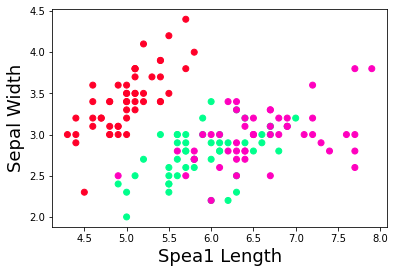

In [19]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

#### Now, let’s instantiate and fit our K means cluster model. We are going to use three clusters and a random state of 21.

In [21]:
km = KMeans(n_clusters = 3,  random_state=21)
km.fit(X)

KMeans(n_clusters=3, random_state=21)

In [22]:
centers = km.cluster_centers_
print(centers)

[[5.77358491 2.69245283]
 [5.006      3.428     ]
 [6.81276596 3.07446809]]


 #### Compare our original data versus our clustered results using the code below 

Text(0.5, 1.0, 'Predicted')

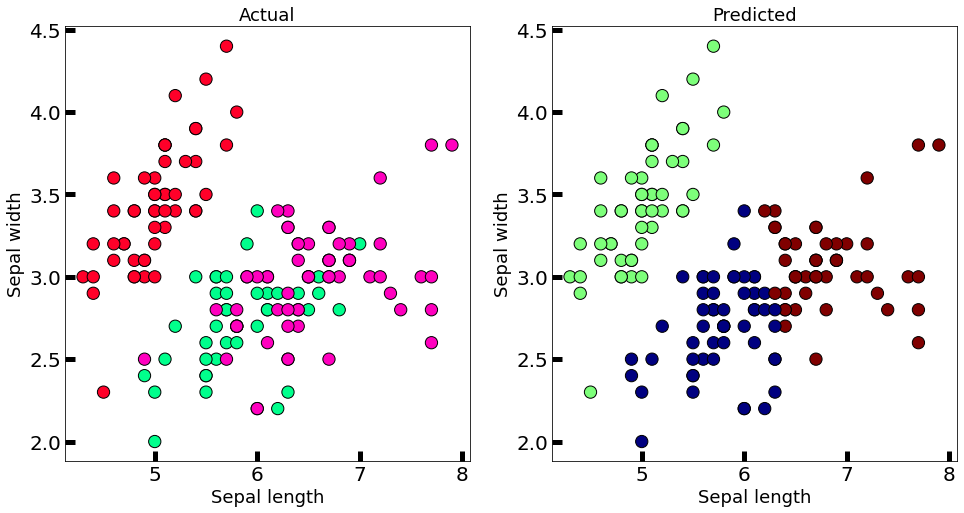

In [23]:
#this will tell us to which cluster does the data observations belong.
new_labels = km.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

#### Here is a list of the main advantages and disadvantages of this algorithm.

###### Advantages:
- K-Means is simple and computationally efficient.
- It is very intuitive and their results are easy to visualize.
###### Disadvantages:
- K-Means is highly scale dependent and is not suitable for data of varying shapes and densities.
- Evaluating results is more subjective. It requires much more human evaluation than trusted metrics.

## References 


1. Sıddık Açıl, May 6, 2018,Newton Square Root Method in Python,https://medium.com/@sddkal/newton-square-root-method-in-python-270853e9185d

2. S. G. Johnson, MIT Course 18.335,February 4, 2015,Square Roots via Newton’s Method,https://math.mit.edu/~stevenj/18.335/newton-sqrt.pdf

3. Aaron Schlegel, Mon 17 August 2020,Chi-Square Test of Independence for R x C Contingency Tables,https://aaronschlegel.me/chi-square-test-independence-contingency-tables.html

4. Reza Rajabi,Aug 15, 2019, Using Standard Deviation in Python, Mean, Standard deviation, and Error bar in Python,https://towardsdatascience.com/using-standard-deviation-in-python-77872c32ba9b


5. Magdalena Konkiewicz,Apr 29 2020,Why computing standard deviation in pandas and NumPy yields different results?
Curious? Let’s talk about statistics, populations, and samples…, https://towardsdatascience.com/why-computing-standard-deviation-in-pandas-and-numpy-yields-different-results-5b475e02d112

6. Belen Sanchez,Oct 21, 2018,Predicting Iris Flower Specices With K-means Clustering in python, https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee

7. Wikipedia contributors, Chi-squared test — Wikipedia, the free encyclopedia,2020, https://en.wikipedia.org/wiki/Chi-squared_test